In [1]:
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
tweet = pd.read_csv('Elon_musk.csv')

In [3]:
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
tweet=tweet.drop(columns=['Unnamed: 0'])

In [5]:
tweet.head()

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [6]:
import re  #cleaning text

In [7]:
def cleantxt(text):
    text=re.sub('@[A-Za-z0-9]+','',text) #removes @
    text=re.sub('#','',text) #removes the #symbol
    text=re.sub('RT[\s]+','',text) #removes RT
    text=re.sub('https?:\/\/\S+',"",text)#removes hyperlink
    
    return text

In [8]:
tweet['Text'] = tweet['Text'].apply(cleantxt)

In [9]:
tweet

,Text
0,I�m an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...


In [10]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91882\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91882\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
stop = stopwords.words('english')
stop.append(['&amp'])
lemmatizer = WordNetLemmatizer()

In [12]:
tweet['Text']=tweet['Text'].apply(lambda x : ' '.join([ lemmatizer.lemmatize(word) for word in x.split() if word not in (stop)]))
    

In [13]:
#create a function to get subjectivity.
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get polarity.
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:
tweet['Subjectivity'] = tweet['Text'].apply(getSubjectivity)
tweet['Polarity']=tweet['Text'].apply(getPolarity)

In [15]:
tweet

,Text,Subjectivity,Polarity
0,I�m alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge underestimated,0.000000,0.000000
4,Congratulations Tesla China amazing execution ...,0.366667,0.345313
...,...,...,...
1994,"True, sound surreal, negative propaganda still...",0.492857,0.152381
1995,Make sure read ur term &amp; condition clickin...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb Dumber <U+0001F525><U+0001F525>,0.500000,-0.375000


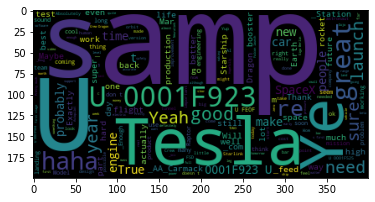

In [16]:
#Word Cloud
words = ' '.join([ txts for txts in tweet['Text']])
wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud)
plt.show()

In [17]:
#create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
tweet['Analysis'] = tweet['Polarity'].apply(getAnalysis)

In [18]:
tweet

,Text,Subjectivity,Polarity,Analysis
0,I�m alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing Cyberpunk HDR next-lev...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China amazing execution ...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, sound surreal, negative propaganda still...",0.492857,0.152381,Positive
1995,Make sure read ur term &amp; condition clickin...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb Dumber <U+0001F525><U+0001F525>,0.500000,-0.375000,Negative


In [19]:
# Print all of the positive tweets
sort_df = tweet.sort_values(by=['Polarity'],ascending=False)

In [20]:
sort_df

,Text,Subjectivity,Polarity,Analysis
410,Merry Christmas &amp; happy holidays! <U+0001F...,1.000000,1.000000,Positive
900,Tesla team done great work!,0.750000,1.000000,Positive
340,<U+0001F3A9> The Greatest Gatsby <U+0001F3A9>,1.000000,1.000000,Positive
1082,Great photo!,0.750000,1.000000,Positive
1857,Great shot!,0.750000,1.000000,Positive
...,...,...,...,...
303,_feed His sick beat,0.857143,-0.714286,Negative
1533,The �early investor� part Tesla wrong. That b ...,0.950000,-0.750000,Negative
1660,": �We going go moon, going base moon, going se...",1.000000,-0.800000,Negative
1422,Boring Co tunnel Vegas month operational,1.000000,-1.000000,Negative


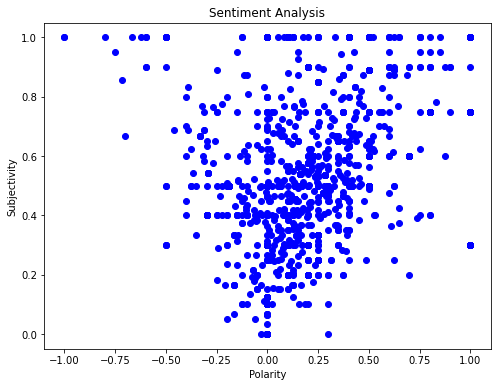

In [21]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,tweet.shape[0]):
    plt.scatter(tweet['Polarity'][i],tweet['Subjectivity'][i],color="Blue")
    plt.title('Sentiment Analysis')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')

In [23]:
#getting percentage of positive tweets & negative tweets
ptweets = tweet[tweet.Analysis == 'Positive']
ptweets = ptweets['Text']
ptweets

2                                        Great interview!
4       Congratulations Tesla China amazing execution ...
5                                      Happy New Year Ox!
7                                        _ Haha thanks :)
9                         The entertaining outcome likely
                              ...                        
1986                          Best use term �Full Stack�?
1987    For sure. This great &amp; terrifying. Everyth...
1991    No easy way answer tweet, helping dire brain i...
1994    True, sound surreal, negative propaganda still...
1995    Make sure read ur term &amp; condition clickin...
Name: Text, Length: 860, dtype: object

In [25]:
round((ptweets.shape[0]/tweet.shape[0])*100,1)

43.0

In [27]:
ntweets = tweet[tweet.Analysis=='Negative']
ntweets = ntweets['Text']
ntweets

0                                               I�m alien
6       Frodo underdoge, All thought would fail, Himse...
25      _ Starlink staggeringly difficult technical &a...
26      _ SpaceX need pas deep chasm negative cash flo...
32      Everyone Tesla receives stock. My comp stock/o...
                              ...                        
1943    _feed The strength &amp; perseverance people T...
1949    Reusability essential. A rocket single use abs...
1958    We reduced pricing Model Y LR dual motor &amp;...
1989                               Sorry, hopefully soon!
1997           Altho Dumb Dumber <U+0001F525><U+0001F525>
Name: Text, Length: 195, dtype: object

In [28]:
round((ntweets.shape[0]/tweet.shape[0])*100,1)

9.8

Text(0.5, 1.0, 'Sentiment Analysis')

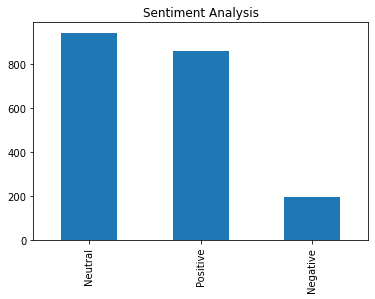

In [30]:
tweet['Analysis'].value_counts().plot(kind='bar')
plt.show
plt.title('Sentiment Analysis')